## Data Loading and Cleaning
**Name**: Soniya Sharma  
**Contact**: soniya.iiser@gmail.com  
**Date**: 02/17/2025  

## Table of Contents  
1. [Introduction](#intro)
2. [Amazon Meta Dataset](#meta)
3. [Amazon Reviews Dataset](#reviews)


### Introduction <a id="intro"></a>

In this notebook, our main focus is to clean reviews and meta datasets and finally merge the cleaned datasets to create the final dataframe.

#### Downloading Amazon dataset

You can download the necessary dataset from [here](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/tree/main/raw). I am using the reviews and meta data for Hamdmade_products category.

Amazon Review 2023 is an updated version of the Amazon Review 2018 dataset.
This dataset mainly includes reviews (ratings, text) and item metadata (desc-
riptions, category information, price, brand, and images). Compared to the pre-
vious versions, the 2023 version features larger size, newer reviews (up to Sep
2023), richer and cleaner meta data, and finer-grained timestamps (from day to 
milli-second).

#### Importing Python Libraries

Importing necessary libraries for data pre-processing

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# # Ignore all warnings to avoid cluttering the output
# import warnings
# warnings.filterwarnings("ignore")

In [125]:
# show all dataframe columns
pd.set_option('display.max_columns', None)
# set matplotlib global settings eg. figsize
plt.rcParams['figure.figsize'] = (8.0, 6.0)

sns.set_style("darkgrid")  #Setting grid style in seaborn

#pd.set_option('display.max_colwidth', 1000)  # display long column titles

In [126]:
#delete this cell before submission
# chunk1_rev = pd.read_json('../../Datasets/Sports_and_Outdoors.jsonl', lines=True,nrows=10000)
# # df_list_rev = [chunk for chunk in chunks_rev]  
# # df_reviews = pd.concat(df_list_rev, ignore_index=True) 
# #chunk1_rev.head()

# chunk1_meta = pd.read_json('../../Datasets/meta_Sports_and_Outdoors.jsonl', lines=True,nrows=10000)
# # df_list_meta = [chunk for chunk in chunks_meta]  
# # df_meta = pd.concat(df_list_meta, ignore_index=True) 
# chunk1_meta.head()


### Amazon Meta dataset <a id="meta"></a>

Overview: Contains item meta data including average_rating, rating_number, features etc.

Step: Importing meta data into a new dataframe meta_df.

In [127]:
# Load the Meta data json file into a dataframe
meta_df = pd.read_json('../../data/meta_Handmade_Products.jsonl',lines=True)

# Display the first few rows of the 'meta_df' DataFrame
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Handmade,Daisy Keychain Wristlet Gray Fabric Key fob La...,4.5,12,"[High Quality Fabrics, Antique Brass Metallic ...",[This charming Daisy Fabric Keychain wristlet ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Clothing, Shoes & Accessor...",{'Package Dimensions': '8 x 4 x 0.85 inches; 0...,B07NTK7T5P,NaN
1,Handmade,Anemone Jewelry Beauteous November Birthstone ...,4.1,10,"[Stunning gemstone and detailed design, Bands ...",[Anemone brings this November birthstone ring ...,69.00,[{'thumb': 'https://m.media-amazon.com/images/...,[],Anemone Jewelry,"[Handmade Products, Jewelry, Rings, Statement]","{'Department': 'womens', 'Date First Available...",B0751M85FV,NaN
2,Handmade,Silver Triangle Earrings with Chevron Pattern,5.0,1,[],[These large silver triangles are stamped with...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Zoë Noelle Designs,"[Handmade Products, Jewelry, Earrings, Drop & ...","{'Department': 'Women', 'Date First Available'...",B01HYNE114,NaN
3,Handmade,"Las Vegas Subway Sign Print - Caesar's, Freemo...",1.0,1,[],[Subway Signs make fabulous wall art. A bit of...,19.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'June 14, 2018'}",B07TKZF3Z1,NaN
4,Handmade,Round Cut Cubic Zirconia Stud Earrings Fashion...,4.2,2,[⭐【Size】The remarkable cubic zirconia studs ha...,[],14.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],VDKIDKT,"[Handmade Products, Jewelry, Earrings, Stud]",{'Package Dimensions': '2.36 x 2.05 x 1.65 inc...,B0BKBJT5MM,NaN


In [128]:
# Inspecting meta_df and check its concise summary
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164817 entries, 0 to 164816
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    164803 non-null  object 
 1   title            164817 non-null  object 
 2   average_rating   164817 non-null  float64
 3   rating_number    164817 non-null  int64  
 4   features         164817 non-null  object 
 5   description      164817 non-null  object 
 6   price            97648 non-null   float64
 7   images           164817 non-null  object 
 8   videos           164817 non-null  object 
 9   store            163699 non-null  object 
 10  categories       164817 non-null  object 
 11  details          164817 non-null  object 
 12  parent_asin      164817 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 17.6+ MB


In [129]:
# Print the shape of the 'meta_df' DataFrame
print(f"The shape of the amazon meta dataset is {meta_df.shape[0]} by {meta_df.shape[1]}.")

The shape of the amazon meta dataset is 164817 by 14.


In [130]:
# Check duplicated rows (after removing columns that contain lists)
meta_df.drop(columns=['categories','features','description','details','images','videos']).duplicated().sum()

0

In [131]:
#check the proportion of null values 
meta_df.isnull().mean()*100

main_category        0.008494
title                0.000000
average_rating       0.000000
rating_number        0.000000
features             0.000000
description          0.000000
price               40.753684
images               0.000000
videos               0.000000
store                0.678328
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
dtype: float64

Since the `bought_together` column contains only null values, we drop it from the dataframe. The features, description, videos, images and categories columns contain lists that are empty; however, since they haven’t been encoded as NaN, the info method does not show them as having null values. For now, we will keep them as they are and decide later whether to convert them into NaNs.

In [132]:
meta_df.drop(columns='bought_together',inplace=True)

We are missing less than 1% of the data in the `main_category` and `store` columns in the meta dataset. Since the missing values are minimal, we will proceed by dropping them.

In [ ]:
meta_df = meta_df.dropna(subset=['main_category','store']).reset_index(drop=True)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin
0,Handmade,Daisy Keychain Wristlet Gray Fabric Key fob La...,4.5,12,"[High Quality Fabrics, Antique Brass Metallic ...",[This charming Daisy Fabric Keychain wristlet ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Clothing, Shoes & Accessor...",{'Package Dimensions': '8 x 4 x 0.85 inches; 0...,B07NTK7T5P
1,Handmade,Anemone Jewelry Beauteous November Birthstone ...,4.1,10,"[Stunning gemstone and detailed design, Bands ...",[Anemone brings this November birthstone ring ...,69.00,[{'thumb': 'https://m.media-amazon.com/images/...,[],Anemone Jewelry,"[Handmade Products, Jewelry, Rings, Statement]","{'Department': 'womens', 'Date First Available...",B0751M85FV
2,Handmade,Silver Triangle Earrings with Chevron Pattern,5.0,1,[],[These large silver triangles are stamped with...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Zoë Noelle Designs,"[Handmade Products, Jewelry, Earrings, Drop & ...","{'Department': 'Women', 'Date First Available'...",B01HYNE114
3,Handmade,"Las Vegas Subway Sign Print - Caesar's, Freemo...",1.0,1,[],[Subway Signs make fabulous wall art. A bit of...,19.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'June 14, 2018'}",B07TKZF3Z1
4,Handmade,Round Cut Cubic Zirconia Stud Earrings Fashion...,4.2,2,[⭐【Size】The remarkable cubic zirconia studs ha...,[],14.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],VDKIDKT,"[Handmade Products, Jewelry, Earrings, Stud]",{'Package Dimensions': '2.36 x 2.05 x 1.65 inc...,B0BKBJT5MM
5,Handmade,"Baptism Stickers, First Communion Stickers, Ch...",4.0,7,[],[Customized and personalized stickers have adv...,7.70,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Stationery & Party Supplie...","{'Date First Available': 'November 17, 2015'}",B0184PPCZK
6,Handmade,Leopard print aluminum pet id tag,5.0,1,[],[Leopard Print Pet Tag. Personalize your pet's...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Blue Fox Gifts,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'December 30, 2017'}",B083MB8QW1
7,Handmade,"Personalized 2022 Anniversary Gift for Her, An...",4.4,7,[Personalized handmade fine white porcelain or...,[Our wedding anniversary gift is personalized ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Personalized Gift Market,"[Handmade Products, Home & Kitchen, Home Décor...","{'Date First Available': 'November 4, 2017'}",B077CZM6K9
8,Handmade,Wedding Notebook Little Notes For The Big Day ...,4.5,3,[Journal Measurements: Outer Size - 5'' x 7'' ...,[Little Notes For The Big Day Personalized Jou...,22.00,[{'thumb': 'https://m.media-amazon.com/images/...,[],Define Design 11,"[Handmade Products, Stationery & Party Supplie...","{'Date First Available': 'April 6, 2017'}",B06Y3M39N6
9,Handmade,Wool Dryer Balls - 4-Pack - XL Premium Natural...,5.0,6,[Energy Save - Saving you up to 41% drying tim...,"[These handmade dryer balls can last up to 1,0...",10.49,[{'thumb': 'https://m.media-amazon.com/images/...,[],My Ganesha,"[Handmade Products, Home & Kitchen, Cleaning S...",{'Package Dimensions': '9.96 x 6.42 x 2.87 inc...,B0BNB7SWM8


In [134]:
#Checking if all items belong to the category of `Hand made Products`
meta_df['main_category'].value_counts(normalize=True,dropna=False) 

main_category
Handmade                  0.999768
Amazon Home               0.000067
AMAZON FASHION            0.000055
Office Products           0.000037
Health & Personal Care    0.000018
Pet Supplies              0.000018
All Beauty                0.000012
All Electronics           0.000012
Arts, Crafts & Sewing     0.000006
Amazon Devices            0.000006
Name: proportion, dtype: float64

Since the vast majority of the data (99.98%) belongs to the Handmade category, and the remaining categories make up only a tiny fraction of the dataset, we will remove these other categories to ensure we are working with a single, consistent category.

In [135]:
meta_handmade_df = meta_df[meta_df['main_category'] == 'Handmade'].reset_index(drop=True)
meta_handmade_df['main_category'].value_counts(dropna= False)

main_category
Handmade    163647
Name: count, dtype: int64

A second way to confirm an item’s main_category is by checking the first element in the list stored in the categories column. Before doing that, let’s first check the length of the lists in the categories column.

In [136]:
np.sort(meta_handmade_df['categories'].map(len).unique())

array([0, 2, 3, 4, 5, 6, 7])

In [137]:
print(f"There are {len(meta_handmade_df[meta_handmade_df['categories'].map(len) == 0])} records with missing categories.")

#Since there are only 1,030 such rows, let’s delete them to ensure we are only working with confirmed Handmade category items.
meta_handmade_df = meta_handmade_df[meta_handmade_df['categories'].map(len) > 0].reset_index(drop=True)

There are 1030 records with missing categories.


`Price` column  has over 40% of the rows with missing data. First, lets ask the question, how important are prices going to be as a feature to predict the average/rating number of an item?

In [138]:
# Delete this cell before submission
meta_handmade_df.corr(numeric_only=True)

,average_rating,rating_number,price
average_rating,1.000000,-0.000224,-0.013469
rating_number,-0.000224,1.000000,-0.006170
price,-0.013469,-0.006170,1.000000


To begin with, we don't really see a strong linear correlation between rating_number/average_rating and prices. Lets look at the distribution of prices across the whole dataset

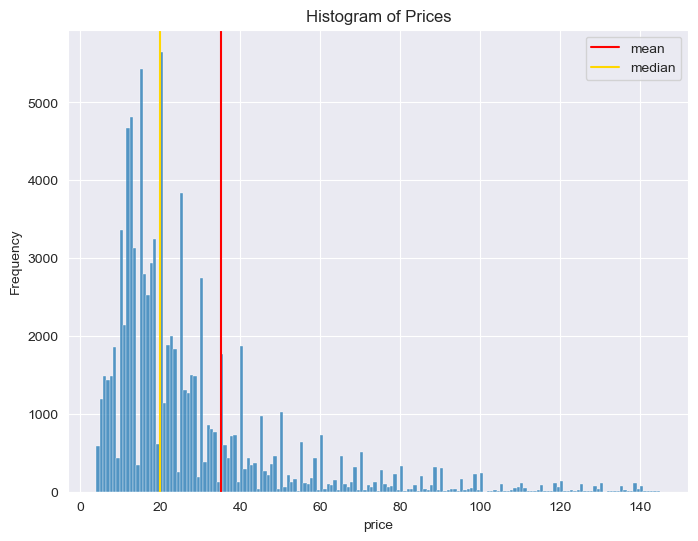

In [139]:
#plot distribution of prices for overall dataset
plt.figure()

# Define lower and upper quantiles to remove outliers (high-fliers)
lower, upper = meta_handmade_df['price'].quantile([0.01, 0.975]) 

# Plot histogram of prices within the defined range
sns.histplot(meta_handmade_df[(meta_handmade_df['price']> lower) & (meta_handmade_df['price']< upper)]['price']  )

# Add vertical lines to show the median and mean
plt.axvline(meta_handmade_df['price'].mean(), c="r", label="mean")
plt.axvline(meta_handmade_df['price'].median(), c="gold", label="median")

# Add title,labels and legend
plt.title("Histogram of Prices")
plt.ylabel("Frequency")
plt.legend()
plt.show()


We observe that the data is heavily skewed to the right (mean > median). To handle missing values, if we group by a very broad sub-category (e.g., only main_category), we may end up with a median that doesn’t represent the individual variations within the finer sub-categories. Therefore, we could:
* Remove records with missing prices, which would still leave us with ~100k rows in the dataset.
* Impute missing values using the median price for each sub-category.

To explore the first approach, let’s further examine the rows with missing prices.

In [ ]:
#storing the records with missing prices into a separate dataframe
meta_price_na = meta_handmade_df[meta_handmade_df['price'].isnull()].

meta_price_na.info() #checking the subsetted dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 65465 entries, 0 to 164810
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_category   65465 non-null  object 
 1   title           65465 non-null  object 
 2   average_rating  65465 non-null  float64
 3   rating_number   65465 non-null  int64  
 4   features        65465 non-null  object 
 5   description     65465 non-null  object 
 6   price           0 non-null      float64
 7   images          65465 non-null  object 
 8   videos          65465 non-null  object 
 9   store           65465 non-null  object 
 10  categories      65465 non-null  object 
 11  details         65465 non-null  object 
 12  parent_asin     65465 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 7.0+ MB


In [22]:
# Splitting the categories column into different columns 
meta_price_na = meta_price_na.join(meta_price_na.apply(lambda x: pd.Series(x['categories']), axis=1)).rename(columns={0:'maincategory',1:'sub_category_1',2:'sub_category_2',3:'sub_category_3',4:'sub_category_4',5:'sub_category_5',6:'sub_category_6'})#.stack().reset_index(level=1, drop=True)
meta_price_na.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,maincategory,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,sub_category_6
0,Handmade,Daisy Keychain Wristlet Gray Fabric Key fob La...,4.5,12,"[High Quality Fabrics, Antique Brass Metallic ...",[This charming Daisy Fabric Keychain wristlet ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Clothing, Shoes & Accessor...",{'Package Dimensions': '8 x 4 x 0.85 inches; 0...,B07NTK7T5P,Handmade Products,"Clothing, Shoes & Accessories",Luggage & Travel Gear,Key & Identification Accessories,Keychains & Keyrings,NaN,NaN
2,Handmade,Silver Triangle Earrings with Chevron Pattern,5.0,1,[],[These large silver triangles are stamped with...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Zoë Noelle Designs,"[Handmade Products, Jewelry, Earrings, Drop & ...","{'Department': 'Women', 'Date First Available'...",B01HYNE114,Handmade Products,Jewelry,Earrings,Drop & Dangle,NaN,NaN,NaN
6,Handmade,Leopard print aluminum pet id tag,5.0,1,[],[Leopard Print Pet Tag. Personalize your pet's...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Blue Fox Gifts,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'December 30, 2017'}",B083MB8QW1,Handmade Products,Home & Kitchen,Artwork,Prints,NaN,NaN,NaN
7,Handmade,"Personalized 2022 Anniversary Gift for Her, An...",4.4,7,[Personalized handmade fine white porcelain or...,[Our wedding anniversary gift is personalized ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Personalized Gift Market,"[Handmade Products, Home & Kitchen, Home Décor...","{'Date First Available': 'November 4, 2017'}",B077CZM6K9,Handmade Products,Home & Kitchen,Home Décor,Decorative Accessories,Ornaments,NaN,NaN
13,Handmade,"Quotes Wall Decor stickers, Camper Decor for I...",4.2,16,[],[Our Home Sweet Camper decal is part of our ca...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Mrs. Sasquatch's Barefoot Studio,"[Handmade Products, Home & Kitchen, Home Décor...",{'Package Dimensions': '10 x 6 x 1 inches; 0.8...,B0933DQPKT,Handmade Products,Home & Kitchen,Home Décor,Decorative Accessories,Stickers,NaN,NaN


In [23]:
# checking dtypes of subcategories columns
meta_price_na.dtypes

main_category      object
title              object
average_rating    float64
rating_number       int64
features           object
description        object
price             float64
images             object
videos             object
store              object
categories         object
details            object
parent_asin        object
maincategory       object
sub_category_1     object
sub_category_2     object
sub_category_3     object
sub_category_4     object
sub_category_5     object
sub_category_6     object
dtype: object

In [ ]:
# sanity check- first sub-category should be the same as main category
meta_price_na['main_category'].value_counts(normalize=True,dropna=False) 

main_category
Handmade    1.0
Name: proportion, dtype: float64

In [26]:
#Dropping the maincategory column as it is a duplicated column
meta_price_na.drop(columns =['maincategory'],inplace=True)

meta_price_na.columns

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'sub_category_6'],
      dtype='object')

In [29]:
# Checking the proportion of missing values in subcategories  
# (Note: Higher-level subcategories may be empty simply because deeper classification isn't needed.) 
meta_price_na[['sub_category_1','sub_category_2','sub_category_3','sub_category_4','sub_category_5','sub_category_6']].isnull().mean()

sub_category_1    0.000000
sub_category_2    0.013824
sub_category_3    0.116306
sub_category_4    0.712610
sub_category_5    0.942504
sub_category_6    0.999694
dtype: float64

Over 90% of the rows don’t have categories defined at levels 5 and 6. Lets investigate these sub_categories further. Specifically, we will check whether these items belong to a specific subset of categories or if they are spread across a broader range. 

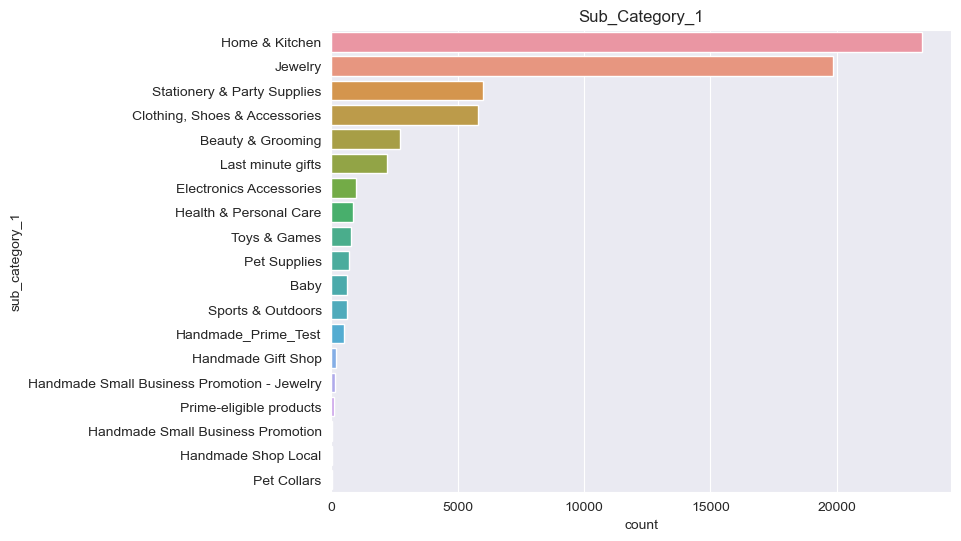

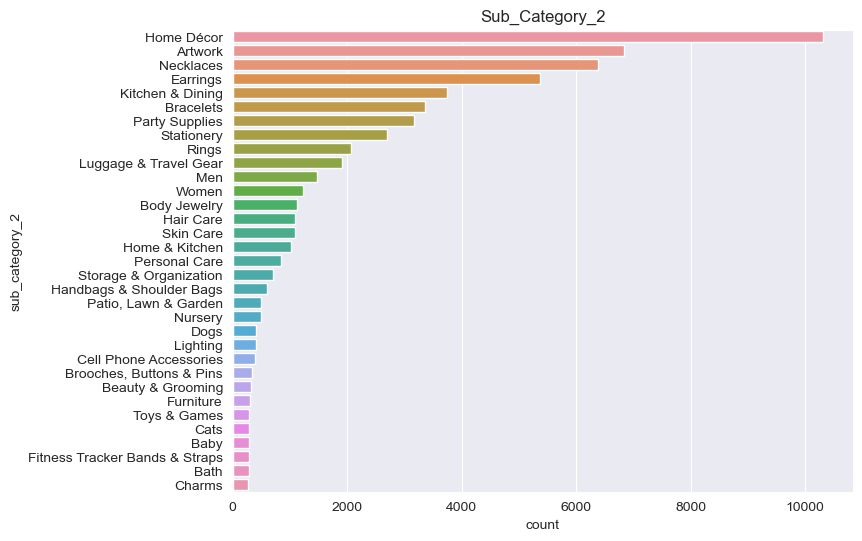

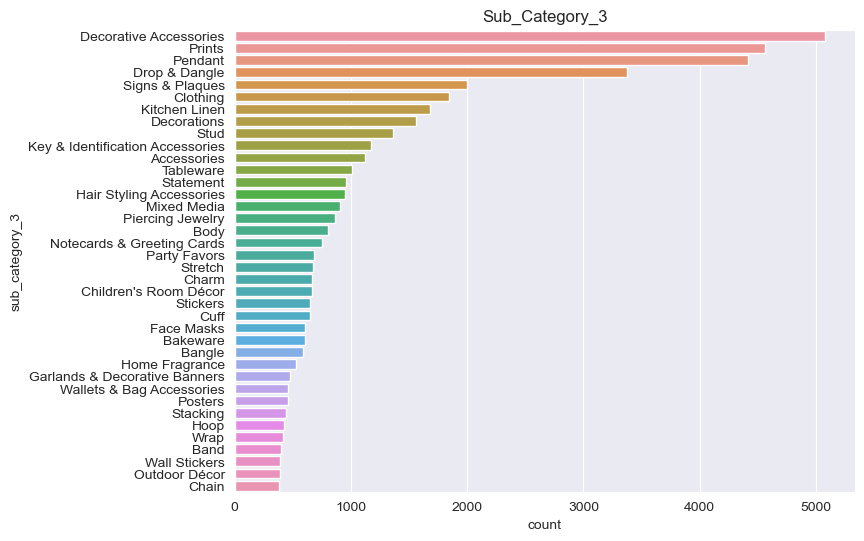

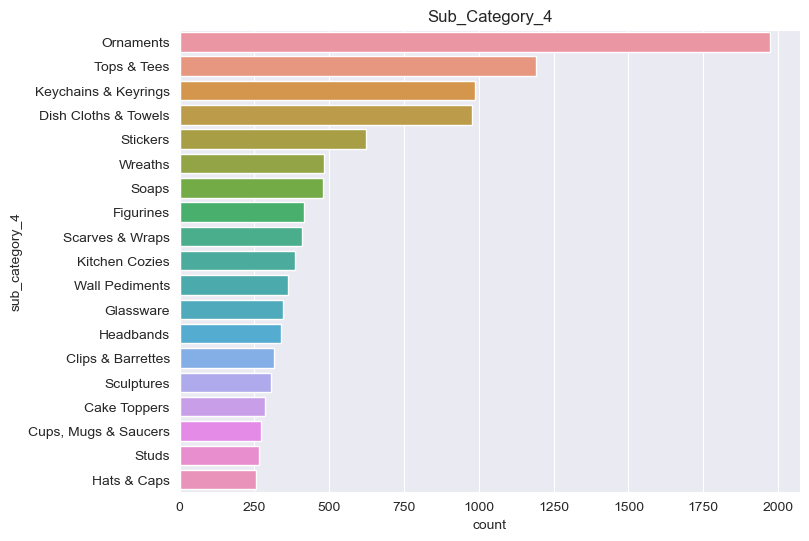

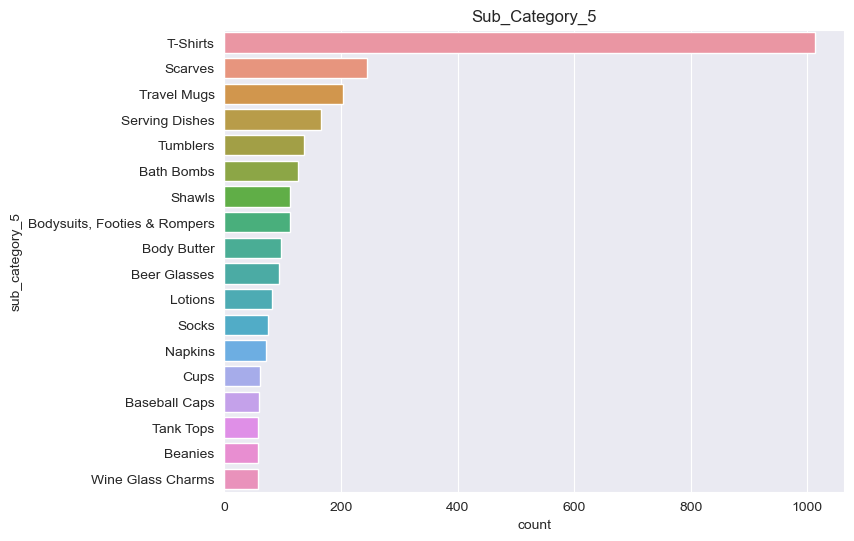

In [ ]:
# Only plotting subcategories with records above a certain threshold to ensure cleaner plots.

thres = [10,250,350,250,50]

for i in range(1,6):  #omitting subcategory 6 for plotting as it mostly has nulls
    filtered_cat = meta_price_na['sub_category_'+str(i)].value_counts()[lambda x: x > thres[i-1]].index.to_list()

    sub = meta_price_na[meta_price_na['sub_category_'+str(i)].isin(filtered_cat)]
    
    plt.figure()

    sns.countplot(y='sub_category_'+str(i),data=sub, order = sub['sub_category_'+str(i)].value_counts().index)
    plt.title('Sub_Category_'+str(i))
    
    plt.show()

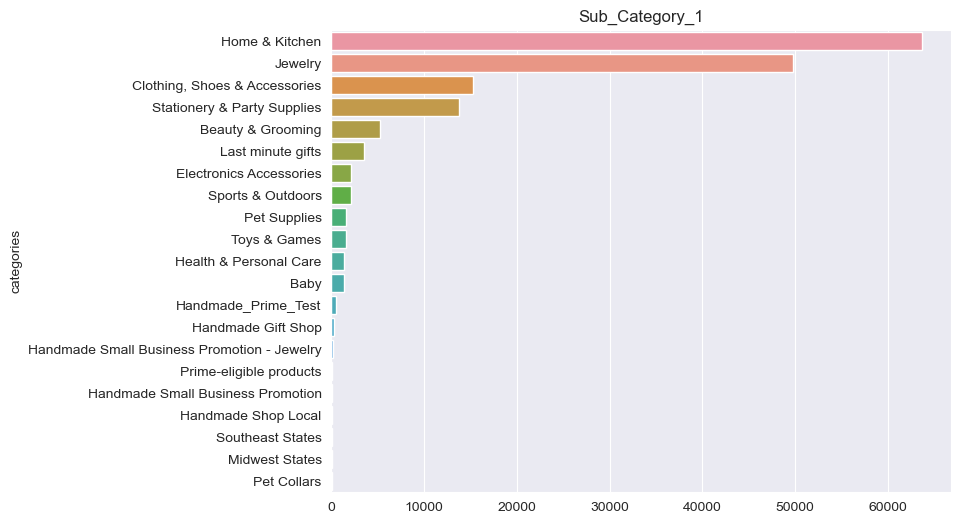

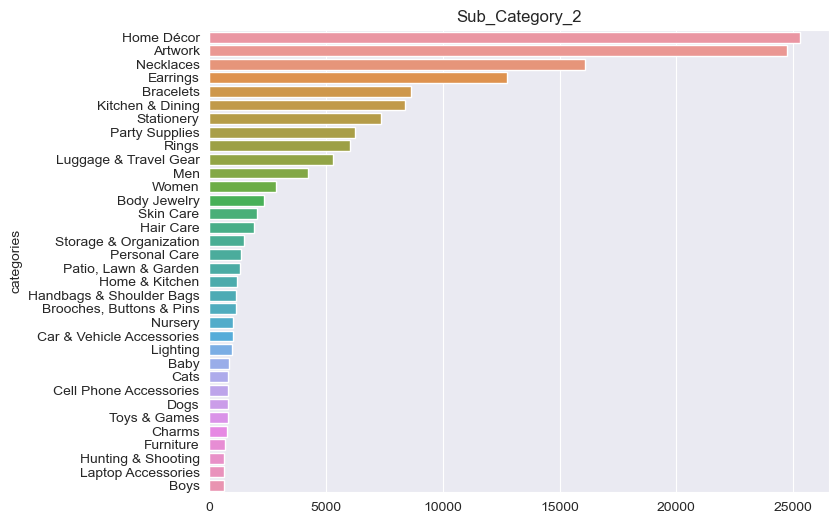

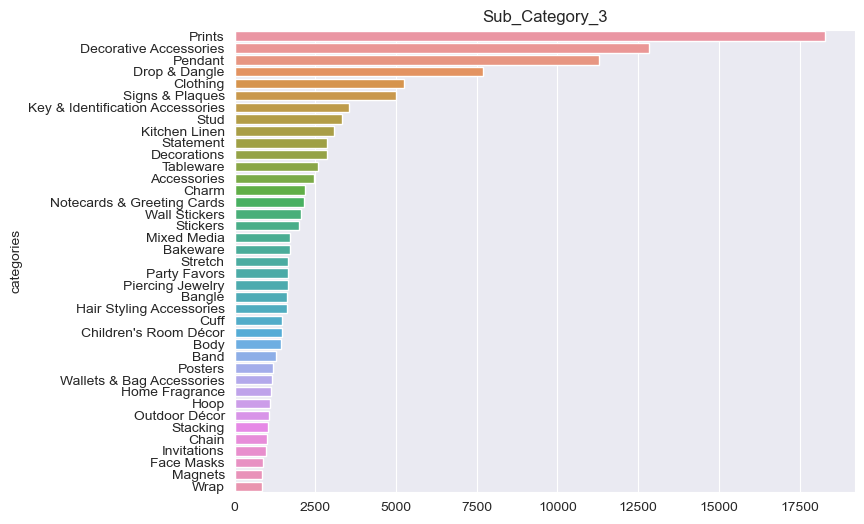

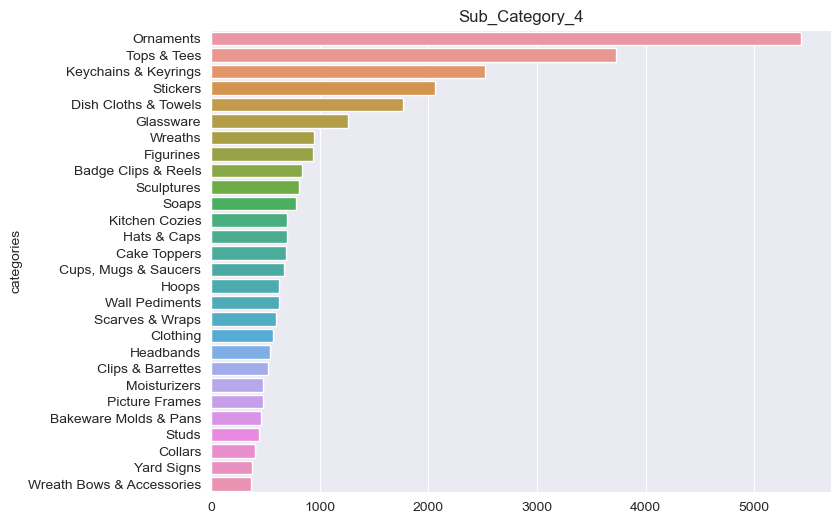

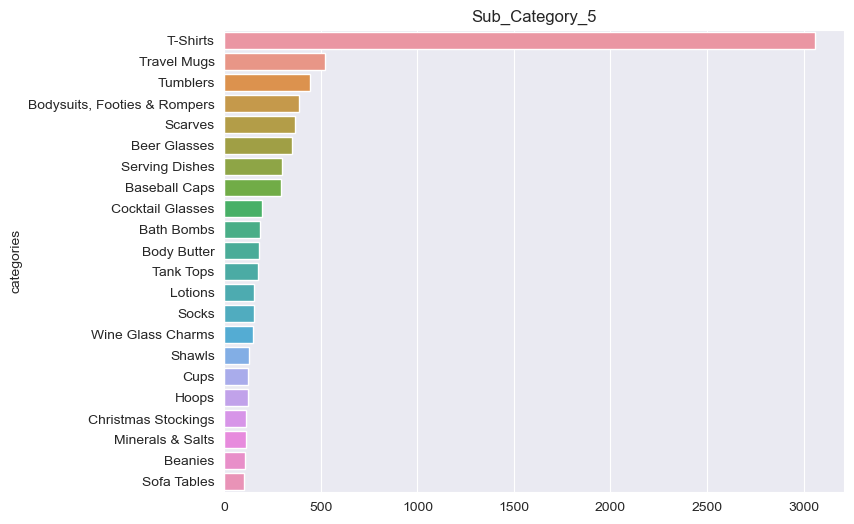

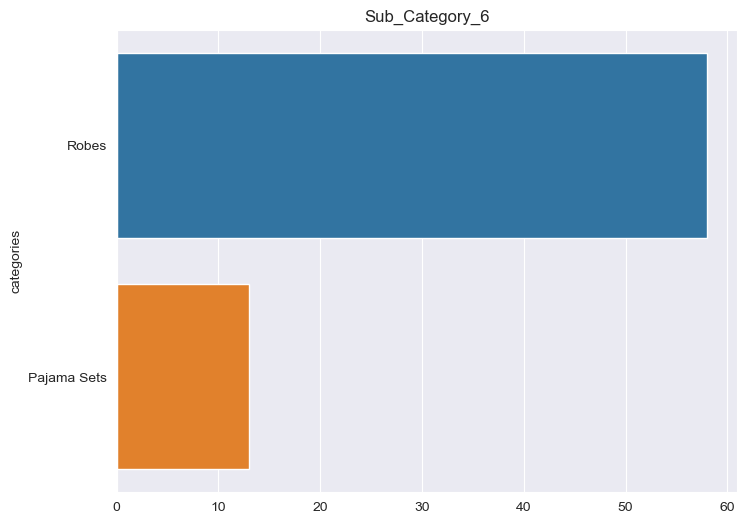

In [ ]:
#lets check similar distribution for the original dataframe 

thres = [10,600,800,350,100,10]

for i in range(1,7):
    
    filtered_rows  = meta_handmade_df['categories'].map(len).isin(list(range(i+1)))
    
    plt.figure()
    sns.barplot(y = meta_handmade_df[~filtered_rows]['categories'].map(lambda x: x[i]).value_counts()[lambda x: x > thres[i-1]].index, x=meta_handmade_df[~filtered_rows]['categories'].map(lambda x: x[i]).value_counts()[lambda x: x > thres[i-1]].values)
    
    plt.title('Sub_Category_'+str(i))
    
    plt.show()

The distribution of data across different sub-categories for rows with missing prices closely mirrors the overall distribution. This suggests that removing records without a listed price would still retain a representative 60% of the dataset.

In [76]:
#create a cleaned dataframe with  missing rows removed.

meta_clean_df = meta_handmade_df.dropna(subset='price')

meta_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97152 entries, 1 to 164816
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_category   97152 non-null  object 
 1   title           97152 non-null  object 
 2   average_rating  97152 non-null  float64
 3   rating_number   97152 non-null  int64  
 4   features        97152 non-null  object 
 5   description     97152 non-null  object 
 6   price           97152 non-null  float64
 7   images          97152 non-null  object 
 8   videos          97152 non-null  object 
 9   store           97152 non-null  object 
 10  categories      97152 non-null  object 
 11  details         97152 non-null  object 
 12  parent_asin     97152 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.4+ MB


Next, we explore the second approach of imputing missing prices using the group median, let’s examine the distribution of prices at the sub-category level.

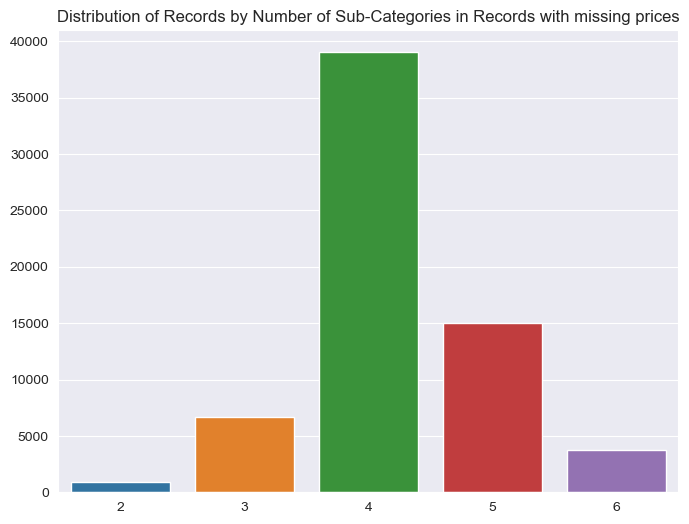

In [ ]:
#delete this cell before submission
# As an additional sanity check, we can compare the number of records with at least x subcategories between the original dataset and the subset of rows with missing prices. If the distributions are similar, it further supports the idea that removing missing price records would not introduce significant bias. If discrepancies exist, we may need to investigate whether missingness is concentrated in specific category depths.

sub = meta_price_na['categories'].map(len)
sub_dict = {i: sub[sub == i].count() for i in range(2,max(sub))}

sns.barplot(x = list(sub_dict.keys()), y= list(sub_dict.values()))
plt.title('Distribution of Records by Number of Sub-Categories in Records with missing prices')
plt.show()

In [54]:
#Plotting no of records with atleast x subcategories to find the best sub-category level for imputation

# Creating a new Series 'sub' that contains the length of the list inside the 'categories' column for each row
sub = meta_handmade_df['categories'].map(len)

# Creating a dictionary where the key is the number of sub-categories and the value is the frequency of rows with that number of sub-categories
sub_dict = {i: sub[sub >= i].count() for i in range(1,max(sub))}
print(sub_dict)

{1: 162617, 2: 162617, 3: 161558, 4: 148668, 5: 45154, 6: 9585}


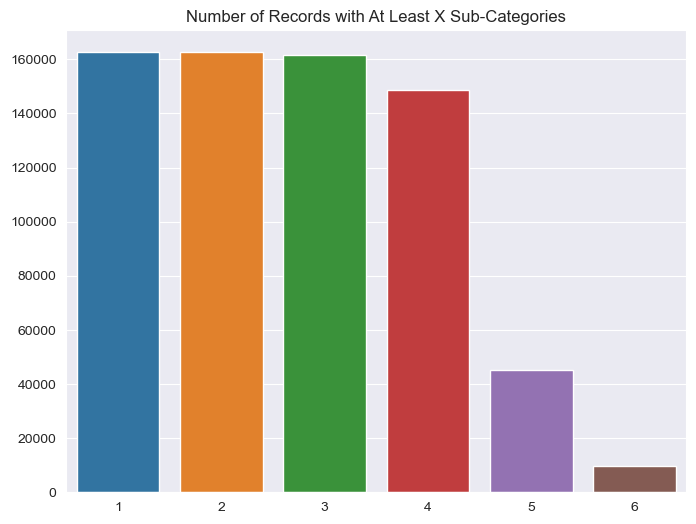

In [55]:
#distribution of data across subcategories
sns.barplot(x = list(sub_dict.keys()), y= list(sub_dict.values()))
plt.title('Number of Records with At Least X Sub-Categories')
plt.show()

Using the plot above, we can also observe that about 98% of records have at least three sub-categories, making either of sub-category 2 or 3 a strong candidate for grouping when imputing missing prices. When selecting a sub-category level for grouping, we want to ensure that it does not split the data too thinly, as having too few records in individual groups could lead to unreliable median estimates for imputation.

Note that the first sub-category is simply the main category, which all items belong to, so it does not provide useful differentiation.

In [56]:
#first split the list of categories column into different columns in the dataframe
meta_sub_df = meta_handmade_df.join(meta_handmade_df.apply(lambda x: pd.Series(x['categories']), axis=1)).rename(columns={0:'maincategory',1:'sub_category_1',2:'sub_category_2',3:'sub_category_3',4:'sub_category_4',5:'sub_category_5',6:'sub_category_6'}).drop(columns='maincategory')

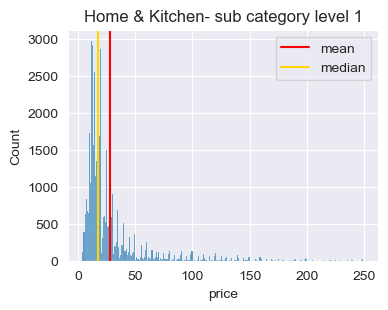

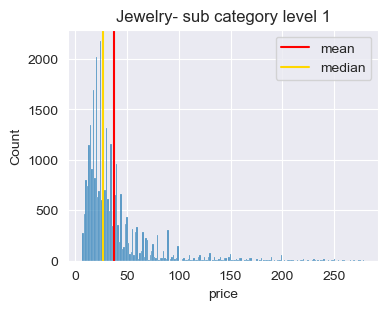

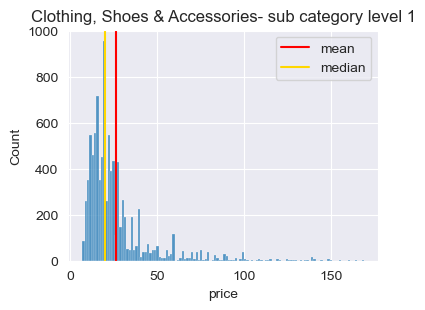

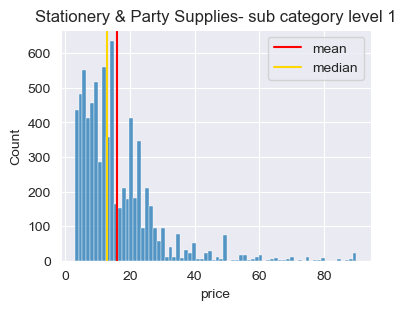

In [ ]:
#may be delete this cell if you are using level 3 for imputation
#check the distribution prices for top 4 categories in level 1

for cat in meta_sub_df['sub_category_1'].value_counts().index.to_list()[:4]:
     lower, upper = meta_handmade_df[meta_sub_df['sub_category_1'] == cat]['price'].quantile([0.01, 0.99])

     plt.figure(figsize=(4,3))
     sns.histplot(meta_sub_df[(meta_sub_df['sub_category_1'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'])
     
     # Add vertical lines to show the median and mean
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_1'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].mean(), c="r", label="mean")
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_1'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].median(), c="gold", label="median")
     
     plt.title(cat +'- sub category level 1')
     plt.legend()
     
     plt.show()

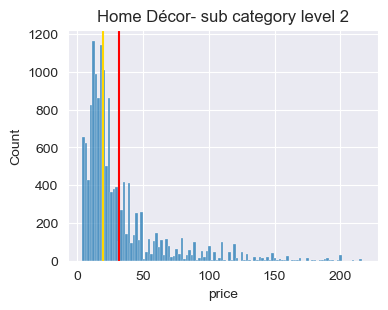

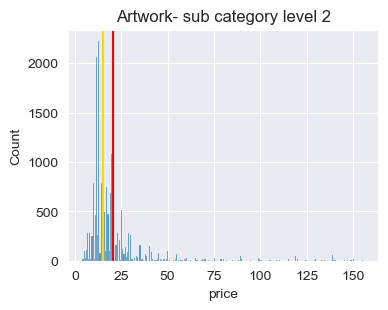

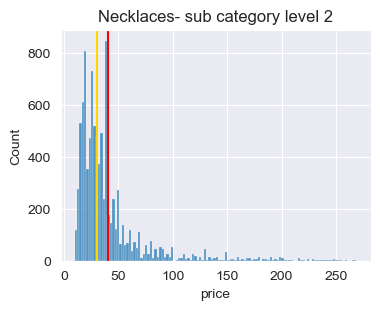

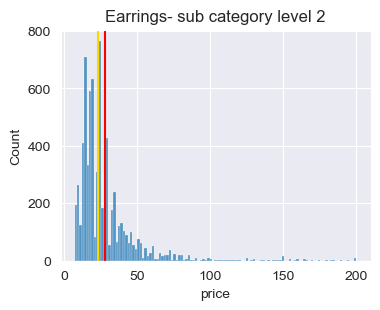

In [ ]:
#may be delete this cell if you are using level 3 for imputation
#check the distribution of prices for top 4 categories in level 2

for cat in meta_sub_df['sub_category_2'].value_counts().index.to_list()[:4]:
     lower, upper = meta_handmade_df[meta_sub_df['sub_category_2'] == cat]['price'].quantile([0.01, 0.99])

     plt.figure(figsize=(4,3))
     
     sns.histplot(meta_sub_df[(meta_sub_df['sub_category_2'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'])
     
     # Add vertical lines to show the median and mean
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_2'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].mean(), c="r", label="mean")
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_2'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].median(), c="gold", label="median")
     
     plt.title(cat+'- sub category level 2')
     plt.show()

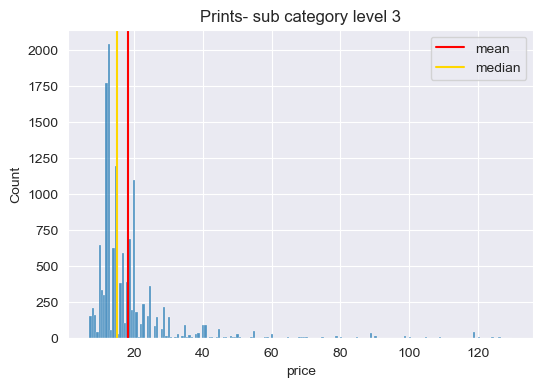

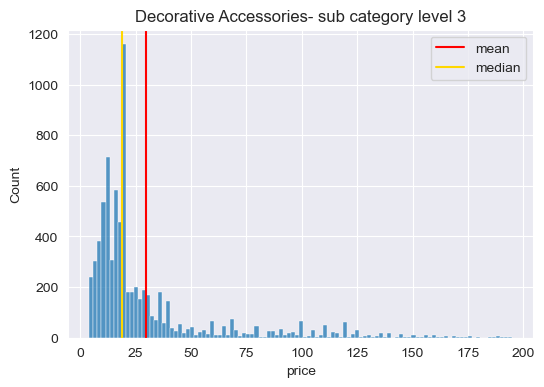

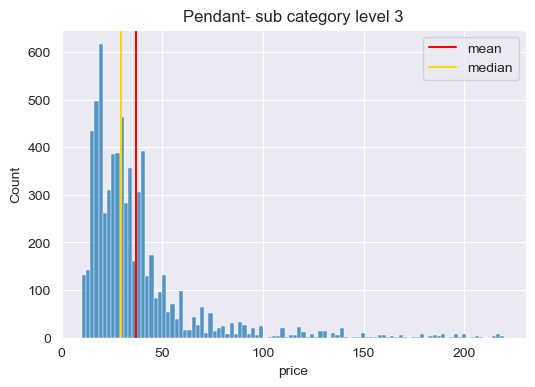

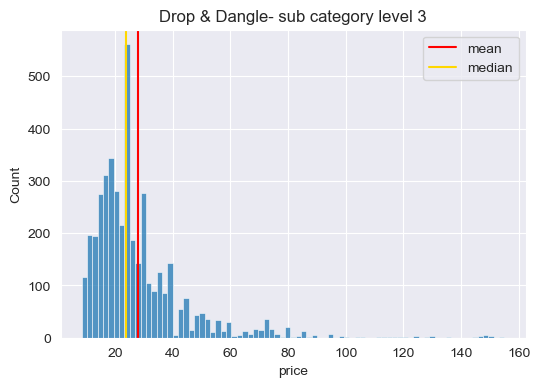

In [ ]:
#check the distribution of prices in sub_category 3 column

for cat in meta_sub_df['sub_category_3'].value_counts().index.to_list()[:4]:
     lower, upper = meta_handmade_df[meta_sub_df['sub_category_3'] == cat]['price'].quantile([0.01, 0.99])

     plt.figure(figsize=(6,4))
     
     sns.histplot(meta_sub_df[(meta_sub_df['sub_category_3'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'])
     
     # Add vertical lines to show the median and mean
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_3'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].mean(), c="r", label="mean")
     plt.axvline(meta_sub_df[(meta_sub_df['sub_category_3'] == cat) & (meta_sub_df['price']> lower) & (meta_sub_df['price']< upper)]['price'].median(), c="gold", label="median")
     
     plt.title(cat+'- sub category level 3')
     plt.legend() 
     
     plt.show()

In [92]:
# Impute missing prices by using the median price of each subcategory (level 3) 
# Only imputing prices for subcategories with more than 20 records
subcategories_min_20 = meta_sub_df['sub_category_3'].value_counts()[lambda x: x > 20].index.to_list() 

# Create a dictionary mapping subcategories to their median price
categories_dict =meta_sub_df[meta_sub_df['sub_category_3'].isin(subcategories_min_20)].groupby('sub_category_3')['price'].median().to_dict()

meta_filled_df = meta_sub_df.copy()

# Apply imputation
meta_filled_df['price'] = meta_sub_df['price'].fillna(meta_sub_df['sub_category_3'].map(categories_dict))


In [ ]:
#Check the number of remaining nulls in Price column
meta_filled_df.isna().mean()

main_category     0.000000
title             0.000000
average_rating    0.000000
rating_number     0.000000
features          0.000000
description       0.000000
price             0.048076
images            0.000000
videos            0.000000
store             0.000000
categories        0.000000
details           0.000000
parent_asin       0.000000
sub_category_1    0.000000
sub_category_2    0.006512
sub_category_3    0.085778
sub_category_4    0.722329
sub_category_5    0.941058
sub_category_6    0.999391
dtype: float64

In [93]:
#dropping the missing prices

meta_df_filled.dropna(subset='price',inplace=True)

/var/folders/hk/f3tl_gcd70sd77bvz776_qvh0000gn/T/ipykernel_36510/513391101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_filled.dropna(subset='price',inplace=True)


In [94]:
# Check descriptive statistics of numeric columns

meta_filled_df.describe()

,average_rating,rating_number,price
count,162617.000000,162617.000000,154799.000000
mean,4.482295,22.103138,30.965545
std,0.742161,124.058564,262.199844
min,1.000000,1.000000,0.010000
25%,4.200000,2.000000,14.950000
50%,4.700000,4.000000,19.990000
75%,5.000000,14.000000,29.950000
max,5.000000,16370.000000,100000.000000


In [96]:
# check outliers for price column
meta_filled_df[meta_filled_df['price'] > 3000]

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,sub_category_6
6576,Handmade,"Farmhouse Style Credenza, Rustic Buffet, Recla...",3.0,1,[],[],4525.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Combine 9,"[Handmade Products, Home & Kitchen, Furniture,...","{'Date First Available': 'November 18, 2019'}",B081PC6PCH,Home & Kitchen,Furniture,Kitchen & Dining Room Furniture,NaN,NaN,NaN
11237,Handmade,"REAL ELK ANTLER CHANDELIER, TWO TIERS, 15 LIGH...",5.0,2,[],[Thunder ridge antler art EXTRA LARGE 15 light...,3995.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Thunder ridge antler art for me,"[Handmade Products, Home & Kitchen, Lighting, ...","{'Date First Available': 'May 20, 2017'}",B071P5KWD7,Home & Kitchen,Lighting,Ceiling Lighting,NaN,NaN,NaN
50672,Handmade,Pink Mirror man costume with mirror hat/suit w...,5.0,1,[],[Look at our updated mirror man costume! The p...,3829.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Clothing, Shoes & Accessor...","{'Department': 'Mens', 'Date First Available':...",B0BG4Z66HP,"Clothing, Shoes & Accessories",Men,Clothing,Costumes,NaN,NaN
78372,Handmade,Semi Abstract Angel,1.0,1,[],[five feet tall by four feet wide. semi abstra...,100000.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'May 7, 2018'}",B07CXDNRJD,Home & Kitchen,Artwork,Paintings,NaN,NaN,NaN
108362,Handmade,Freestyle Painting,1.0,1,[],"[20"" by 16"" acrylic]",11000.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Home & Kitchen, Artwork, P...","{'Date First Available': 'May 23, 2018'}",B07D8LGBDP,Home & Kitchen,Artwork,Paintings,NaN,NaN,NaN
130330,Handmade,"Anjistouch Natural Pink Sapphire, Moonstone wi...",1.0,1,[],"[Natural Diamonds, Sapphire in 14k Solid Rose ...",3764.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Jewelry, Necklaces, Pendant]","{'Department': 'Women', 'Date First Available'...",B08R8BX9N3,Jewelry,Necklaces,Pendant,NaN,NaN,NaN
146208,Handmade,"Epoxy Table, Epoxy Resin River Table, Plain Ed...",5.0,1,"[PLAIN EDGE WOODEN EPOXY TABLE, A Heritage to ...","[Size: : 36"" x 84"" Inch *Customization Availab...",3370.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Home & Kitchen, Furniture,...","{'Date First Available': 'October 14, 2020'}",B09XLP496W,Home & Kitchen,Furniture,Kitchen & Dining Room Furniture,NaN,NaN,NaN
151921,Handmade,costozon antique bracelets 17.6 Tcw Rose Cut D...,5.0,1,[],[costozon antique bracelets 17.6 Tcw Rose Cut ...,3430.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Jewelry, Bracelets, Bangle]","{'Department': 'Womens', 'Date First Available...",B07MMF41Y8,Jewelry,Bracelets,Bangle,NaN,NaN,NaN


In [100]:
#Most of these outliers have at most 2 ratings, so it might be safe to drop them
meta_filled_df = meta_filled_df[meta_filled_df['price'] <= 3000]
meta_filled_df['price'].describe()

count    154791.000000
mean         30.102024
std          53.373450
min           0.010000
25%          14.950000
50%          19.990000
75%          29.950000
max        2988.000000
Name: price, dtype: float64

In [ ]:
#All values are unique in the parent id column
meta_filled_df.parent_asin.nunique()/len(meta_filled_df)

1.0

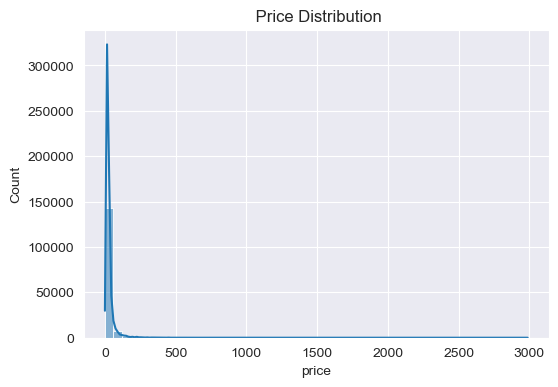

In [102]:


plt.figure(figsize=(6, 4))
sns.histplot(meta_filled_df['price'], bins=50, kde=True)
plt.title(" Price Distribution")
plt.show()


In [103]:
meta_filled_df[meta_filled_df['price'] > 500].describe()

,average_rating,rating_number,price
count,223.000000,223.000000,223.000000
mean,4.560538,3.008969,1013.380673
std,0.885043,7.900844,514.269774
min,1.000000,1.000000,505.000000
25%,4.500000,1.000000,623.500000
50%,5.000000,1.000000,840.000000
75%,5.000000,3.000000,1299.000000
max,5.000000,112.000000,2988.000000


In [ ]:
#things to do : 
#visualization

We can see that  subcateories further down in the hierarchy have increasingly more missing values. So one approach to imputing missing prices would be to only use sub_category1.

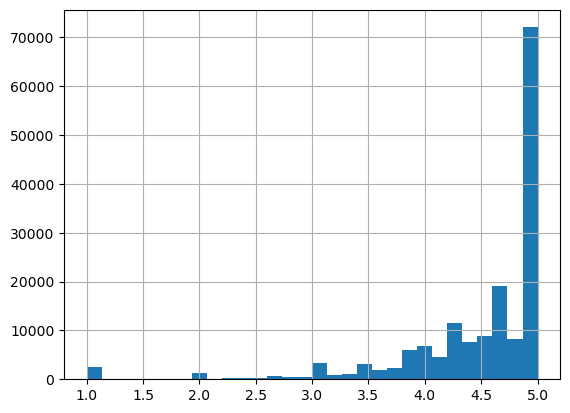

In [ ]:
#plotting distribution of average_rating for all items in the meta dataset

meta_handmade_df['average_rating'].hist(bins=30)
plt.show()

In [ ]:
meta_handmade_df['rating_number'].describe()

count    163685.000000
mean         22.064820
std         123.913718
min           1.000000
25%           2.000000
50%           4.000000
75%          14.000000
max       16370.000000
Name: rating_number, dtype: float64

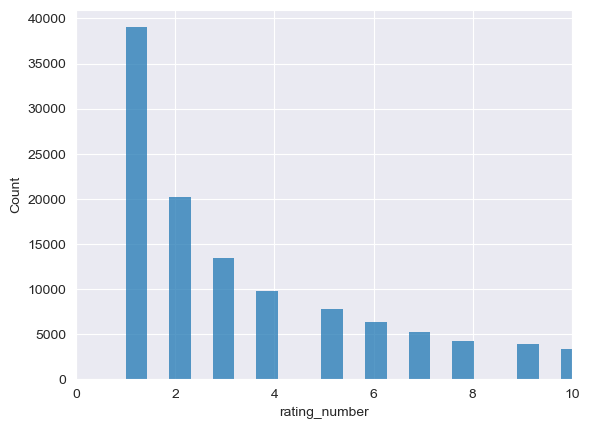

In [ ]:
#plotting distribution of rating_number for all items in the meta dataset

sns.histplot(meta_handmade_df['rating_number'])
plt.xlim(0,10)
plt.show()

In [ ]:
meta_handmade_df[meta_handmade_df['rating_number']> 10000]

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin
6869,Handmade,Cats Dogs ID Tags Personalized Lovely Symbols ...,4.7,16370,[You can choose as per the breed and size of y...,"[♡ ♡ ♡ ♡ ♡ ♡ As pet owners, what you need to...",9.57,[{'thumb': 'https://m.media-amazon.com/images/...,[],Acatinthetree,"[Handmade Products, Pet Supplies, Cats, Collar...","{'Date First Available': 'June 2, 2021'}",B09GK2JJDZ
7545,Handmade,The Original BenShot Bullet Rocks Glass with R...,4.8,10852,"[✅ REAL .308 BULLET: We embed a real, lead-fre...",[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],BenShot,"[Handmade Products, Home & Kitchen, Kitchen & ...",{'Package Dimensions': '4.69 x 4.5 x 4.4 inche...,B01ASDYQQC
90300,Handmade,MARBLEFY Custom Name Airpod Pro Case with Keyc...,4.4,14235,[Customized 】Customize your AirPods case with ...,[Never lose your AirPods in your bag ever agai...,13.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,"[Handmade Products, Electronics Accessories, C...","{'Item Weight': '3 Ounces', 'Department': 'Wom...",B083Q2N1KQ


### Amazon Reviews dataset <a id="reviews"></a>

Overview: Contains full review text data including user_id of the reviewer and the rating they provided.

Step: Importing reviews data into a new dataframe review_df.

In [16]:
# Load the Reviews json file into a dataframe
review_df = pd.read_json('../../data/Handmade_Products.jsonl',lines=True)

# Display the first few rows to get a preview of the 'reviews_df' DataFrame
review_df.head() 

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,2021-05-21 14:31:35.111,1,True
1,5,You simply must order order more than one!,I’ve ordered three bows so far. Have not been ...,[],B084TWHS7W,B084TWHS7W,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,2020-04-24 21:15:46.965,0,True
2,5,Great,As pictured. Used a frame from the dollar stor...,[],B07V3NRQC4,B07V3NRQC4,AEYORY2AVPMCPDV57CE337YU5LXA,2020-06-06 13:09:11.297,0,True
3,5,Well made and so beautiful,"This is beyond beautiful. So shiny, the size ...",[],B071ZMDK26,B071ZMDK26,AEINY4XOINMMJCK5GZ3M6MMHBN6A,2019-06-02 01:14:39.784,2,True
4,5,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,[],B01MPVZ4YP,B01MPVZ4YP,AGCPAPUHXYA3EEIL2KGSQTGO5HRA,2019-01-08 00:12:11.674,1,True


In [21]:
# Inspecting review_df and check its concise summary
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664162 entries, 0 to 664161
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             664162 non-null  int64         
 1   title              664162 non-null  object        
 2   text               664162 non-null  object        
 3   images             664162 non-null  object        
 4   asin               664162 non-null  object        
 5   parent_asin        664162 non-null  object        
 6   user_id            664162 non-null  object        
 7   timestamp          664162 non-null  datetime64[ns]
 8   helpful_vote       664162 non-null  int64         
 9   verified_purchase  664162 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 46.2+ MB


In [23]:
# Print the shape of the 'review_df' DataFrame
print(f"The shape of the review dataset is {review_df.shape[0]} by {review_df.shape[1]}.")

The shape of the review dataset is 664162 by 10.


In [25]:
#check number of null values explicitly
review_df.isnull().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

#Not entirely sure if we need this cell 
While there are no null values in the dataset, we observed from printing the first 5 rows that the `images` column contains `[]` when there are no images.  

To handle this, we'll replace these empty lists with `NaN` values. After making this adjustment, we can check the distribution of the values in the `images` column:

In [83]:
#Not entirely sure if we need this cell 

#missing_rows = review_df['images'].map(len) == 0
# print(f"There are {missing_rows.sum()} rows in the review dataset with no images.")

# #changing empty values to NaN
# review_df.loc[missing_rows,'images'] = np.nan

#checking nulls again
#review_df.isnull().sum()